# Introducción a Pytorch

## Importamos y exploramos los "tensores"

In [ ]:
import torch

In [ ]:
x = torch.empty(5, 3)
print(x)

tensor([[7.0313e-35, 0.0000e+00, 3.3631e-44],
        [0.0000e+00,        nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30, 7.1547e+22],
        [4.5828e+30, 1.2121e+04, 7.1846e+22],
        [9.2198e-39, 7.0374e+22, 0.0000e+00]])


In [ ]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [ ]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3647, 0.1244, 0.2955],
        [0.1179, 0.7181, 0.4982],
        [0.2378, 0.2486, 0.6290],
        [0.3833, 0.6004, 0.8833],
        [0.1153, 0.4567, 0.6796]])


In [ ]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.9043, 0.7561, 1.1050],
        [0.5019, 1.2073, 1.4139],
        [0.5274, 1.2292, 1.3666],
        [0.9367, 1.4152, 0.9232],
        [0.6457, 0.9358, 1.1985]])


In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [ ]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [ ]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [ ]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Descargamos los datos desde torchvision

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 ship plane plane  frog


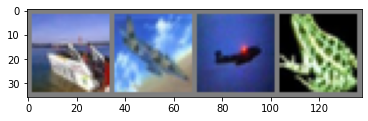

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Función para mostrar imagen
def imshow(img):
  img = img / 2 + 0.5 # desnormalizamos
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))


# obtenemos algunas imágenes de forma aleatoria
dataiter = iter(trainloader)
images, labels = dataiter.next()

# mostramos las imágenes
imshow(torchvision.utils.make_grid(images))
# imprimimos sus etiquetas
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Creamos una red neuronal convolucional

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16 * 5 * 5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x


net = Net()

## Definimos una función de pérdida y optimizador

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Entrenamos la red

In [ ]:
for epoch in range(2): #recorremos el dataset varias veces

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # obtenemos los inputs
    inputs, labels = data

    # ponemos en 0 los gradientes de los parámetros
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # imprimimos resultados parciales
    running_loss += loss.item()
    if i % 2000 == 1999:
      print('[%d, %5d] pérdida: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
      running_loss = 0.0

print('Entrenamiento finalizado')

[1,  2000] pérdida: 2.175
[1,  4000] pérdida: 1.830
[1,  6000] pérdida: 1.690
[1,  8000] pérdida: 1.572
[1, 10000] pérdida: 1.511
[1, 12000] pérdida: 1.482
[2,  2000] pérdida: 1.385
[2,  4000] pérdida: 1.389
[2,  6000] pérdida: 1.358
[2,  8000] pérdida: 1.313
[2, 10000] pérdida: 1.299
[2, 12000] pérdida: 1.298
Entrenamiento finalizado


## Hacemos la prueba con el test dataset

Predicción:    cat  ship  ship plane


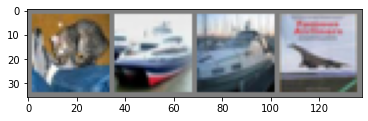

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# imprimimos las imágenes
imshow(torchvision.utils.make_grid(images))
print('Predicción: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

## Revisamos el accuracy de nuestro modelo

In [ ]:
correct = 0
total = 0
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy de la red en las 10000 imágenes de prueba: %d %%' % (
100 * correct / total))

Accuracy de la red en las 10000 imágenes de prueba: 55 %


## Revisamos el accuracy clase por clase

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  for data in testloader:
    images, labels = data
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
      label = labels[i]
      class_correct[label] += c[i].item()
      class_total[label] += 1


for i in range(10):
  print('Accuracy de %5s : %2d %%' % (
  classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy de plane : 65 %
Accuracy de   car : 84 %
Accuracy de  bird : 34 %
Accuracy de   cat : 40 %
Accuracy de  deer : 56 %
Accuracy de   dog : 31 %
Accuracy de  frog : 70 %
Accuracy de horse : 56 %
Accuracy de  ship : 59 %
Accuracy de truck : 59 %
